# SENG 474 A02: Assignment 1
## Random Forests (Without Pruning)
Sean McAuliffe, V00913346  
February 3, 2023

---

# Environment Setup

In [6]:
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install sklearn
# !pip3 install matplotlib
# !pip3 install graphviz

import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
import graphviz

---

# Data Import

In [9]:
print("Importing the income dataset...")
income_dataset = np.genfromtxt('./cleaned_adult.csv', delimiter=',', skip_header=1, dtype=int)

def split_dataset(training_percent):
    """ Split the dataset into training and testing sets """
    np.random.shuffle(income_dataset)
    features = income_dataset[:, :-1]
    labels = income_dataset[:, -1]
    training_features = features[:int(training_percent * features.shape[0])]
    training_labels = labels[:int(training_percent * labels.shape[0])]
    testing_features = features[int(training_percent * features.shape[0]):]
    testing_labels = labels[int(training_percent * labels.shape[0]):]
    return training_features, training_labels, testing_features, testing_labels

# Extract the featrue names from the first row of the dataset
feature_names = np.genfromtxt('./cleaned_adult.csv',
                                delimiter=',',
                                max_rows=1,
                                dtype=str)[:-1]
label_names = ['poor', 'rich']

print("Data ready for retrieval via split_dataset function...")

Importing the income dataset...
Data ready for retrieval via split_dataset function...


---

## Random Forest Sample Code
1. Scikit ensemble methods docs: https://scikit-learn.org/stable/modules/ensemble.html
2. Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
3. Parameter Tuning: https://scikit-learn.org/stable/modules/ensemble.html#parameters

In [40]:
# Example Random Forest Classifier listing all the parameters and
# their default values

rfc = RandomForestClassifier(n_estimators=100,
                            criterion='gini',
                            max_depth=None,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0,
                            max_features='sqrt',
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            bootstrap=True,
                            oob_score=False,
                            n_jobs=None,
                            random_state=None,
                            verbose=0,
                            warm_start=False,
                            class_weight=None,
                            ccp_alpha=0.0,
                            max_samples=None)

# Example of training a Random Forest Classifier
X_train, y_train, X_test, y_test = split_dataset(0.8)
rfc.fit(X_train, y_train)
print("Accuracy of RFC: {:.2f}".format(rfc.score(X_test, y_test)))
# print the number of features
print("Number of features: {}".format(rfc.n_features_in_))

Accuracy of RFC: 0.85
Number of features: 104


---

Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49
Tree 50
Tree 51
Tree 52
Tree 53
Tree 54
Tree 55
Tree 56
Tree 57
Tree 58
Tree 59
Tree 60
Tree 61
Tree 62
Tree 63
Tree 64
Tree 65
Tree 66
Tree 67
Tree 68
Tree 69
Tree 70
Tree 71
Tree 72
Tree 73
Tree 74
Tree 75
Tree 76
Tree 77
Tree 78
Tree 79
Tree 80
Tree 81
Tree 82
Tree 83
Tree 84
Tree 85
Tree 86
Tree 87
Tree 88
Tree 89
Tree 90
Tree 91
Tree 92
Tree 93
Tree 94
Tree 95
Tree 96
Tree 97
Tree 98
Tree 99
Tree 100
Tree 101
Tree 102
Tree 103
Tree 104
Tree 105
Tree 106
Tree 107
Tree 108
Tree 109
Tree 110
Tree 111
Tree 112
Tree 113
Tree 114
Tree 115
Tree 116
Tree 117
Tree 118
Tree 119
Tree 120
Tree 121
Tree 122
Tree 123
Tree 124

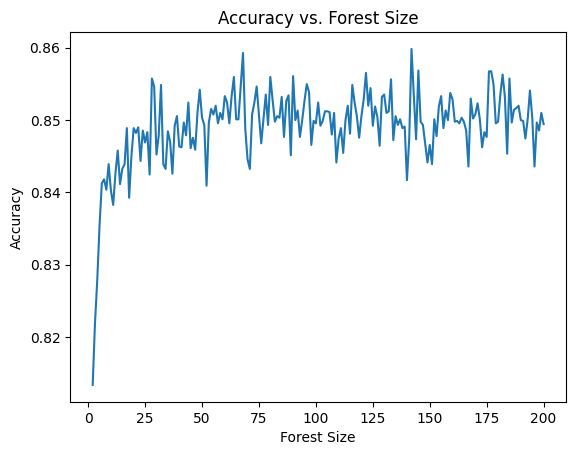

In [14]:
# Experiment 1: Varying the Forest Size

rfc_list = []
for i in range(2, 201):
    X_train, y_train, X_test, y_test = split_dataset(0.8)
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rfc.fit(X_train, y_train)
    rfc_list.append(rfc.score(X_test, y_test))

plt.plot(range(2, 201), rfc_list)
plt.xlabel("Forest Size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Forest Size")
plt.show()

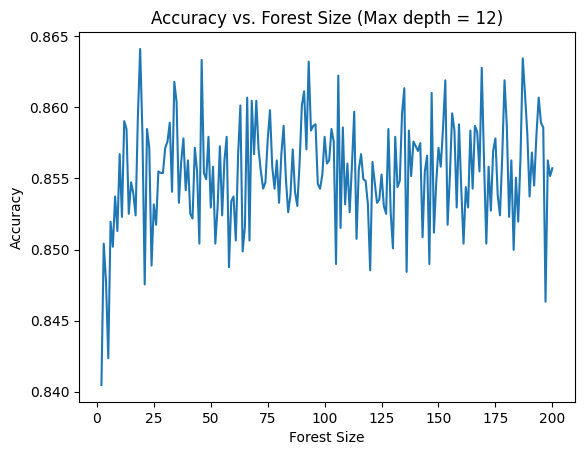

In [19]:
# Experiment 1B: Varying the Forest Size, W/ Limited Max Depth

rfc_list = []
for i in range(2, 201):
    X_train, y_train, X_test, y_test = split_dataset(0.8)
    rfc = RandomForestClassifier(n_estimators=i,
                                n_jobs=-1,
                                max_depth=12)
    rfc.fit(X_train, y_train)
    rfc_list.append(rfc.score(X_test, y_test))

plt.plot(range(2, 201), rfc_list)
plt.xlabel("Forest Size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Forest Size (Max depth = 12)")
plt.show()

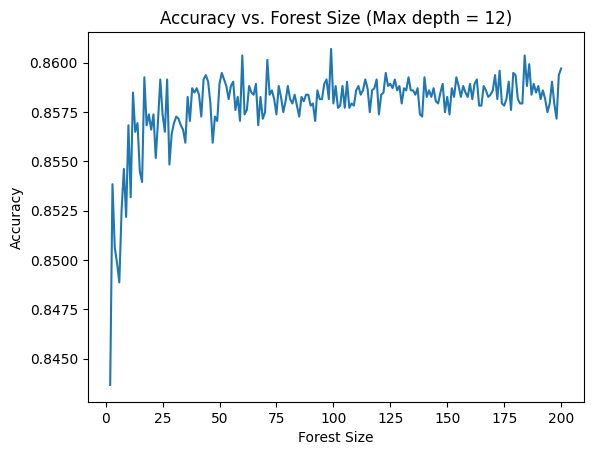

In [24]:
# Experiment 1C: Varying the Forest Size, W/ Limited Max Depth
# With a static training set

rfc_list = []
X_train, y_train, X_test, y_test = split_dataset(0.8)
for i in range(2, 201):
    rfc = RandomForestClassifier(n_estimators=i,
                                n_jobs=-1,
                                max_depth=12)
    rfc.fit(X_train, y_train)
    rfc_list.append(rfc.score(X_test, y_test))

plt.plot(range(2, 201), rfc_list)
plt.xlabel("Forest Size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Forest Size (Max depth = 12)")
plt.show()

Changing the shuffled order of the training + test examples introduces a lot of variability in the accuracy of the model trained on it -> some training examples are just 'lucky'.

Below we are trying to determine the relationship between forest size and accuracy 
by fitting a curve to the accuracy data and finding its maximum.

maximum: 199.9984637007033 0.8583552232362794


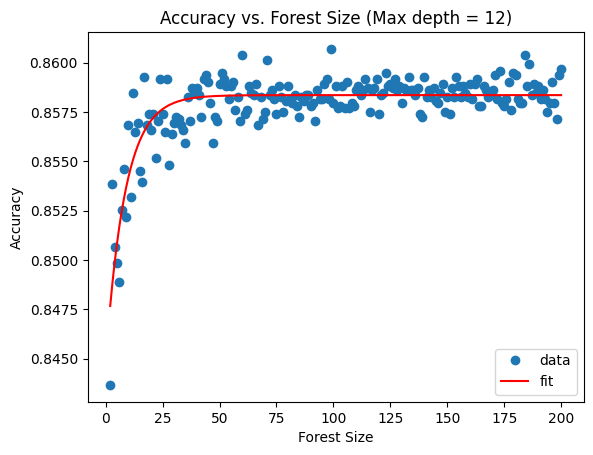

In [38]:
# Scipy curve fitting optimization
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from scipy.optimize import curve_fit, minimize_scalar

def objective(x, a, b, c):
    return a * np.exp(-b * x) + c

# curve fit
popt, _ = curve_fit(objective, range(2, 201), rfc_list)

# Method for finding the maximum
# https://stackoverflow.com/questions/29954153/finding-the-maximum-of-a-curve-scipy
fm = lambda x: -objective(x, *popt)
r = minimize_scalar(fm, bounds=(0, 200))
print("maximum:", r["x"], objective(r["x"], *popt))  #maximum: 2.99846874275 18.3928199902

# plot the curve against the actual data
plt.plot(range(2, 201), rfc_list, 'o', label='data')
plt.plot(range(2, 201), objective(range(2, 201), *popt), 'r-', label='fit')
plt.xlabel("Forest Size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Forest Size (Max depth = 12)")
plt.legend()
plt.show()

The results appear to be that at least up to a forest size of 200, larger is always better. Although the benefits of larger forests diminish as the forest size increases, after about 40-50 trees the further increases are fairly small. In order to keep runtimes manageable, for further parameter tuning we will use the default forrest size of 50.

In the Decision Tree Classifier experiment, optimal pruning tended to reduce the depth of trees to ~12, so for runtime reasons we will use a max depth of 12 for the Random Forest Classifier, rather than allowing all trees to grow to arbitrary depth.

---

In [42]:
# Experiment 2: Varying d', the maximum number of features to train a tree on

feature_limits = ['sqrt', 'log2', None]

rfc_sqrt = RandomForestClassifier(n_estimators=50,
                            max_depth=12,
                            max_features='sqrt',
                            n_jobs=-1)

rfc_log2 = RandomForestClassifier(n_estimators=50,
                            max_depth=12,
                            max_features='log2',
                            n_jobs=-1)

rfc_none = RandomForestClassifier(n_estimators=50,
                            max_depth=12,
                            max_features=None,
                            n_jobs=-1)

X_train, y_train, X_test, y_test = split_dataset(0.8)

rfc_sqrt.fit(X_train, y_train)
rfc_log2.fit(X_train, y_train)
rfc_none.fit(X_train, y_train)

print("Accuracy of RFC (sqrt): {:.5f}".format(rfc_sqrt.score(X_test, y_test)))
print("Accuracy of RFC (log2): {:.5f}".format(rfc_log2.score(X_test, y_test)))
print("Accuracy of RFC (None): {:.5f}".format(rfc_none.score(X_test, y_test)))

# It seems that allowing the algorithm to choose up to all features is the best option

Accuracy of RFC (sqrt): 0.86014
Accuracy of RFC (log2): 0.85218
Accuracy of RFC (None): 0.86169


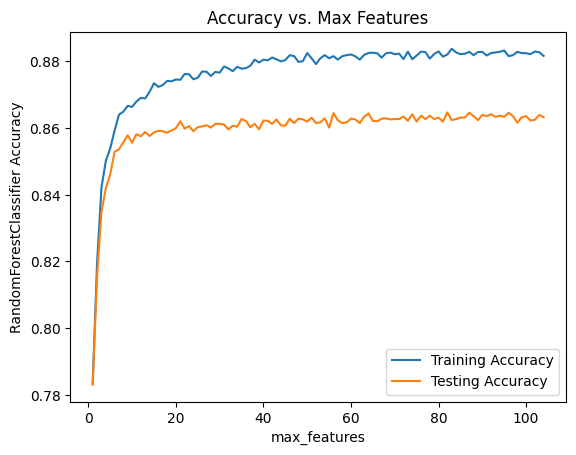

In [60]:
# Experiement 2B: Varying d', the maximum number of features to train a tree on as an int

X_train, y_train, X_test, y_test = split_dataset(0.8)

feature_limit = [x for x in range(1, 105)]
training_accuracy = []
testing_accuracy = []

for i in feature_limit:
    rfc = RandomForestClassifier(n_estimators=50,
                                max_depth=12,
                                max_features=i,
                                n_jobs=-1)
    rfc.fit(X_train, y_train)
    testing_accuracy.append(rfc.score(X_test, y_test))
    training_accuracy.append(rfc.score(X_train, y_train))

plt.plot(feature_limit, training_accuracy, label="Training Accuracy")
plt.plot(feature_limit, testing_accuracy, label="Testing Accuracy")
plt.xlabel("max_features")
plt.ylabel("RandomForestClassifier Accuracy")
plt.title("Accuracy vs. Max Features")
plt.legend()
plt.show()

It seems again that the benefit of including more features in the model increases without apparant bound. However, there is clearly a pattern of diminishing returnsb eginning after ~20 features. We will try and fit a curve to the data in order to better understand the relationship between the number of features and accuracy.

maximum: 89.68039080854953 0.8592692093700449


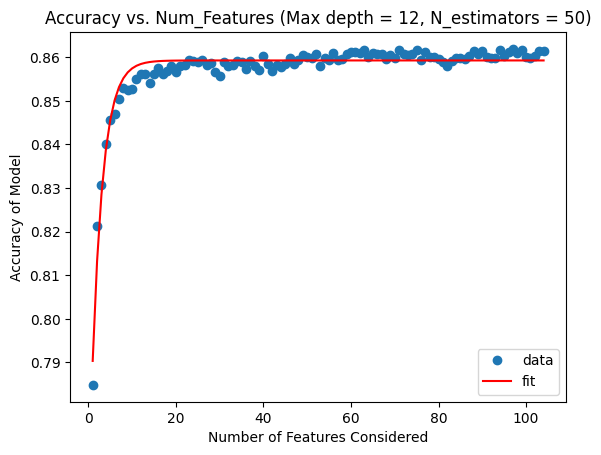

In [57]:
# Scipy curve fitting optimization
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from scipy.optimize import curve_fit, minimize_scalar

def objective(x, a, b, c):
    return a * np.exp(-b * x) + c

# def objective(x, a, b, c):
#     return a  * np.power(x, 2) + b * np.power(x, 1) + c
#     # return a*x**3+b*x**2+c

# curve fit
popt, _ = curve_fit(objective, range(1, 105), rfc_list)

# Method for finding the maximum
# https://stackoverflow.com/questions/29954153/finding-the-maximum-of-a-curve-scipy
fm = lambda x: -objective(x, *popt)
r = minimize_scalar(fm, bounds=(1, 104))
print("maximum:", r["x"], objective(r["x"], *popt))  #maximum: 2.99846874275 18.3928199902

# plot the curve against the actual data
plt.plot(range(1, 105), rfc_list, 'o', label='data')
plt.plot(range(1, 105), objective(range(1, 105), *popt), 'r-', label='fit')
plt.xlabel("Number of Features Considered")
plt.ylabel("Accuracy of Model")
plt.title("Accuracy vs. Num_Features (Max depth = 12, N_estimators = 50)")
plt.legend()
plt.show()

The above result may imply that a slight limiting of the number of features each tree can consider may actually produce benefits for overall model accuracy. Going forward we will limit the number of features each tree can consider to 90 (which is larger than sqrt(104) = ~ 10)

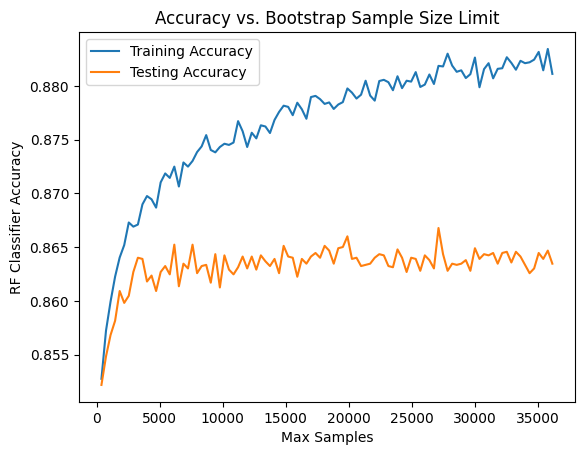

In [61]:
# Experiment 3: Varying the size of the randomly selected sample of training data
# on which a random tree is trained. This is the bootstrap sample size. The default
# is the size of the training set.

# We will use the parameter values we have deicded on so far from the previous section
# n_estimators = 50, max_depth = 12, max_features = 90, and n_jobs = -1
# We will parameterize the training over the max_samples parameter, the default is
# None, which means the size of the training set.

# We will vary the max_samples parameter from 0.001 to 1.0 in increments of 0.01
# as a fraction of the total training set size.

X_train, y_train, X_test, y_test = split_dataset(0.8)

size_modifier = [0.01*x for x in range(1, 101)]
set_size = len(X_train)

train_accuracy = []
test_accuracy = []

for m in size_modifier:
    sample_size = int(m * set_size)
    rfc = RandomForestClassifier(n_estimators=50,
                                criterion='gini',
                                max_depth=12,
                                max_features=90,
                                bootstrap=True,
                                n_jobs=-1, # for parallelization -> faster training
                                ccp_alpha=0.0, # no pruning
                                max_samples=sample_size)
    rfc.fit(X_train, y_train)
    test_accuracy.append(rfc.score(X_test, y_test))
    train_accuracy.append(rfc.score(X_train, y_train))

horizontal_values = [x*set_size for x in size_modifier]
plt.plot(horizontal_values, train_accuracy, label='Training Accuracy')
plt.plot(horizontal_values, test_accuracy, label='Testing Accuracy')
plt.xlabel("Max Samples")
plt.ylabel("RF Classifier Accuracy")
plt.title("Accuracy vs. Bootstrap Sample Size Limit")
plt.legend()
plt.show()



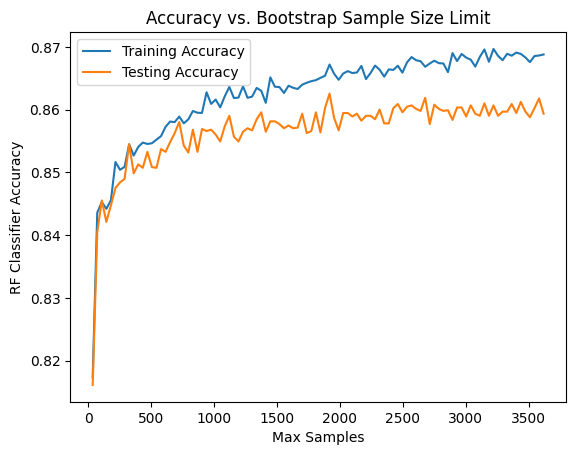

In [64]:
# Experiment 3B: Varying the size of the bootstrap sample, restricted around the
# point of diminishing returns from the above experiment.

# We will use the parameter values we have deicded on so far from the previous section
# n_estimators = 50, max_depth = 12, max_features = 90, and n_jobs = -1
# We will parameterize the training over the max_samples parameter, the default is
# None, which means the size of the training set.

# We will vary the max_samples parameter from 0.001 to 1.0 in increments of 0.01
# as a fraction of the total training set size.

X_train, y_train, X_test, y_test = split_dataset(0.8)

size_modifier = [0.001*x for x in range(1, 101)]
set_size = len(X_train)

train_accuracy = []
test_accuracy = []

for m in size_modifier:
    sample_size = int(m * set_size)
    rfc = RandomForestClassifier(n_estimators=50,
                                criterion='gini',
                                max_depth=12,
                                max_features=90,
                                bootstrap=True,
                                n_jobs=-1, # for parallelization -> faster training
                                ccp_alpha=0.0, # no pruning
                                max_samples=sample_size)
    rfc.fit(X_train, y_train)
    test_accuracy.append(rfc.score(X_test, y_test))
    train_accuracy.append(rfc.score(X_train, y_train))

horizontal_values = [x*set_size for x in size_modifier]
plt.plot(horizontal_values, train_accuracy, label='Training Accuracy')
plt.plot(horizontal_values, test_accuracy, label='Testing Accuracy')
plt.xlabel("Max Samples")
plt.ylabel("RF Classifier Accuracy")
plt.title("Accuracy vs. Bootstrap Sample Size Limit")
plt.legend()
plt.show()



Experiments 3 and 3B show a sharp dropoff into diminishing returns after 2500-5000 training examples are used to form each bootstrap sample.

---

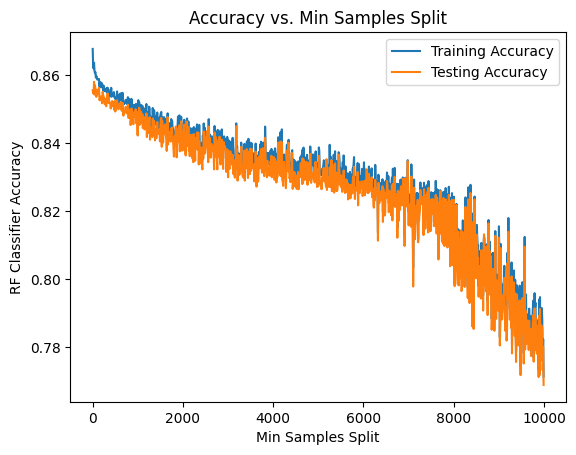

In [65]:
# Experiment 4: Varying Min Samples Split

min_samples = [x for x in range (1, 10000, 10)]

train_accuracy = []
test_accuracy = []
for m in min_samples:
    rfc = RandomForestClassifier(n_estimators=50,
                                criterion='gini',
                                max_depth=12,
                                max_features='sqrt',
                                bootstrap=True,
                                n_jobs=-1, # for parallelization -> faster training
                                ccp_alpha=0.0, # no pruning
                                max_samples=None,
                                min_samples_split=m)
    rfc.fit(X_train, y_train)
    test_accuracy.append(rfc.score(X_test, y_test))
    train_accuracy.append(rfc.score(X_train, y_train))

plt.plot(min_samples, train_accuracy, label='Training Accuracy')
plt.plot(min_samples, test_accuracy, label='Testing Accuracy')
plt.xlabel("Min Samples Split")
plt.ylabel("RF Classifier Accuracy")
plt.title("Accuracy vs. Min Samples Split")
plt.legend()
plt.show()

The above graph shows the overal random forest accuracy as the minimum number of samples required to further split a node is increased from the default of 2, to 10000, in 10 sample increments. The results show that there is no benefit, in terms of accuracy, to increasing the minimum number of samples required to split a node beyond the default of 2 (which produced the best results). For large models, there may be performance reasons for making this adjustment.

## Out of Bag Error
In this section I have implemented a method which for a Random Forest, computes the OOB error prediction for each example in the training set. These predictions are used to score the model.

We will vary the number of trees in the forest and plot the OOB error as a function of the number of trees.

/home/sean/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sean/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/sean/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sean/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/sean/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sean/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(

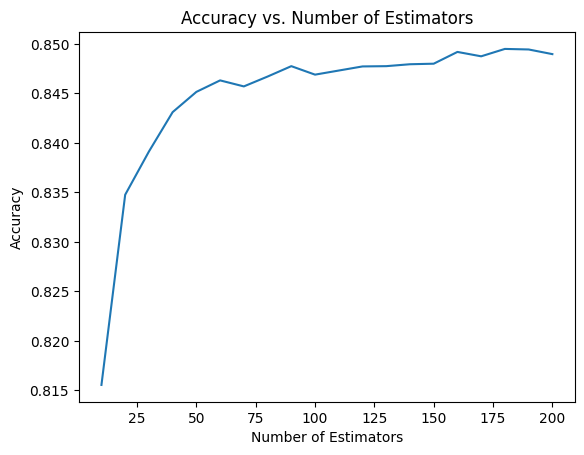

In [73]:
from sklearn.utils import check_random_state

X_train, y_train, X_test, y_test = split_dataset(0.8)
num_training_samples = len(X_train)

estimators = [10*x for x in range(1, 21)]

def find_unsampled_indices(rf, n_samples, n_samples_bootstrap):
    """ Taken from the provded code for the assignment. This function finds the
    indices of the unsampled data points for each tree in a random forest. """
    unsampled_indices_for_all_trees= []
    for estimator in rf.estimators_:
        random_instance = check_random_state(estimator.random_state)
        sample_indices = random_instance.randint(0, n_samples, n_samples_bootstrap)
        sample_counts = np.bincount(sample_indices, minlength = n_samples)
        unsampled_mask = sample_counts == 0
        indices_range = np.arange(n_samples)
        unsampled_indices = indices_range[unsampled_mask]
        unsampled_indices_for_all_trees += [unsampled_indices]
    return unsampled_indices_for_all_trees

def get_rf_prediction(rf, X):
    """ This function takes a random forest and a set X and returns the
    prediction of the random forest for each example in X, using only the trees
    that were not trained on the example. """
    unsampled_i = find_unsampled_indices(rf, num_training_samples, num_training_samples)
    estimators = rf.estimators_
    rf_predictions = []
    for i, x in enumerate(X):
        e_predictions = []
        for j, e in enumerate(estimators):
            if i in unsampled_i[j]:
                e_predictions.append(e.predict(x.reshape(1, -1)))
            else:
                pass
        avg_prediction = np.mean(e_predictions)
        if avg_prediction >= 0.5:
            rf_predictions.append(1)
        else:
            rf_predictions.append(0)
    return rf_predictions

def score_rf(predictions, y):
    """ This function takes a set of predictions and the true labels and returns
    the accuracy of the predictions. """
    correct = 0
    for p, y in zip(predictions, y):
        if p == y:
            correct += 1
    return correct / len(predictions)

rfc_list = []
for i in estimators:
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=0)
    rfc.fit(X_train, y_train)
    P = get_rf_prediction(rfc, X_train)
    score = score_rf(P, y_train)
    rfc_list.append(score)

# plot the score of each RFC against the number of estimators
plt.plot(estimators, rfc_list)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Estimators")
plt.show()



In [75]:
## Inverting the above chart to instead show error
# plot the score of each RFC against the number of estimators
plt.plot(estimators, [1-x for x in rfc_list])
plt.xlabel("Number of Estimators")
plt.ylabel("OOB Error")
plt.title("OOB Error vs. Number of Estimators")
plt.show()

TypeError: unsupported operand type(s) for -: 'int' and 'RandomForestClassifier'

/home/sean/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


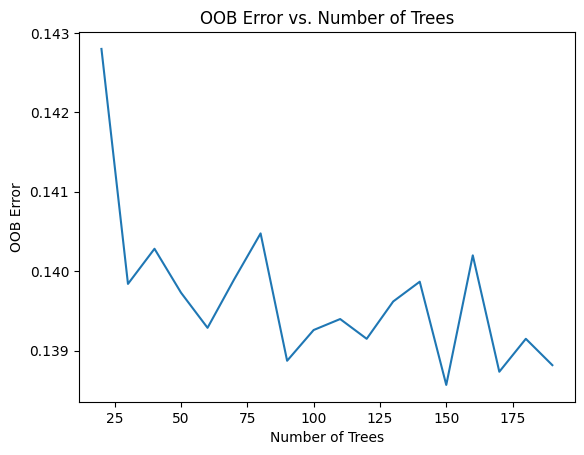

In [74]:
# OOB Error Plot Using the building OOB Score

X_train, y_train, X_test, y_test = split_dataset(0.8)

n_estimators = [x for x in range(20, 200, 10)]
oob_error = []

for n in n_estimators:
    rfc = RandomForestClassifier(n_estimators=n,
                                criterion='gini',
                                max_depth=12,
                                max_features=90,
                                bootstrap=True,
                                n_jobs=-1, # for parallelization -> faster training
                                ccp_alpha=0.0, # no pruning
                                max_samples=None,
                                min_samples_split=2,
                                oob_score=True)
    rfc.fit(X_train, y_train)
    oob_error.append(1 - rfc.oob_score_)
    rfc_list.append(rfc)

plt.plot(n_estimators, oob_error)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error")
plt.title("OOB Error vs. Number of Trees")
plt.show()
